## Assignment 1 - Group 9

## Problem 1 

In [2]:
# (a)
import numpy as np

In [3]:
# (b)
import matplotlib.pyplot as plt

In [4]:
# define the constants
MU = 0.06
SIGMA = 0.20

DAYS = 365
YEARS = 10

In [5]:
# (c)
# assume 100 for the starting price
s_0 = 100
# the solution to the SDE is given by s_t = s_0*exp((mu-sigma^2/2)*t+sigma*w_t)
dt = 1.0/365.0

dz = np.random.randn(DAYS*YEARS)*np.sqrt(dt)

s_p1 = s_0*np.exp(np.cumsum(MU*dt - 0.5*SIGMA**2*dt + SIGMA*dz))



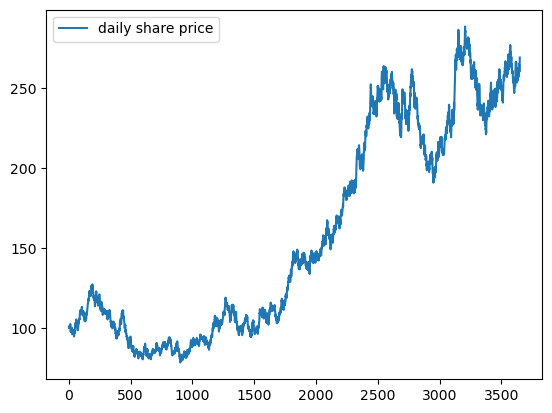

In [6]:
# (d)
plt.plot(s_p1, label='daily share price')
plt.legend()
plt.show()

In [7]:
# (e)
r = np.zeros(DAYS*YEARS-1)
for i in range(len(r)):
    r[i] = np.log(1 + ((s_p1[i+1]-s_p1[i])/s_p1[i]))

  

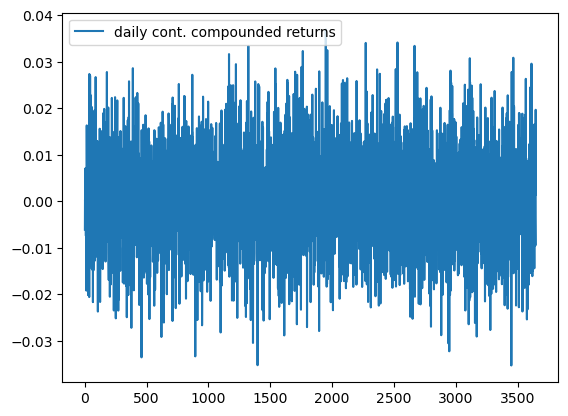

In [8]:
# (f)
plt.plot(r, label='daily cont. compounded returns')
plt.legend()
plt.show()

In [9]:
#(g)
print('The annualized mean log-return is',
      '{:05.5f}'.format(np.mean(r)/dt))
print('The annualized std deviation for log-returns is',
      '{:05.5f}'.format(np.std(r)/np.sqrt(dt)))

The annualized mean log-return is 0.09849
The annualized std deviation for log-returns is 0.20293


## Problem 2

In [10]:
# (a)
import pandas as pd

In [11]:
# (b)
period = pd.period_range('1950-01-01','2020-12-31',freq='D')
dt=1.0/365.0
dz = np.random.randn(len(period))*np.sqrt(dt)
s_p2 = pd.Series(s_0*np.exp(np.cumsum(MU*dt - 0.5*SIGMA**2*dt + SIGMA*dz)),period)

The sample has 25933 observations.


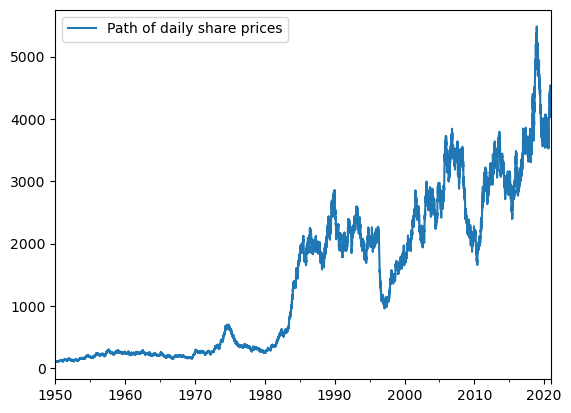

In [12]:
# (c)
print('The sample has {} observations.'.format(len(s_p2)))
s_p2.plot(label = 'Path of daily share prices')
plt.legend()
plt.show()

In [13]:
# (d)
m = s_p2.resample('M').mean()

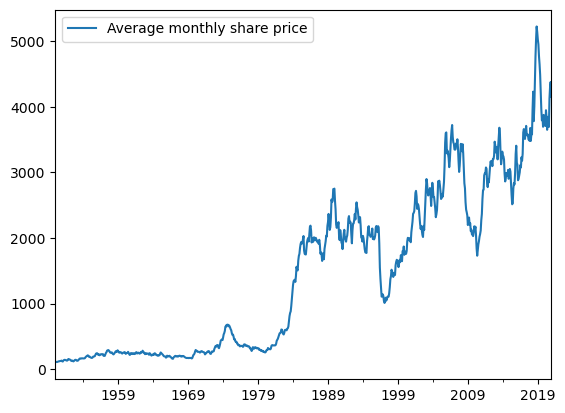

In [14]:
# (e)
m.plot(label='Average monthly share price')
plt.legend()
plt.show()

## Problem 3

The summary statistics for the daily frequency are the following:

count    25932.000000
mean         0.000147
std          0.010445
min         -0.044465
25%         -0.007029
50%          0.000089
75%          0.007279
max          0.044449
dtype: float64

The annualized mean log-return for daily frequency is 0.05370
The annualized std deviation for log-returns for daily frequency is 0.19955


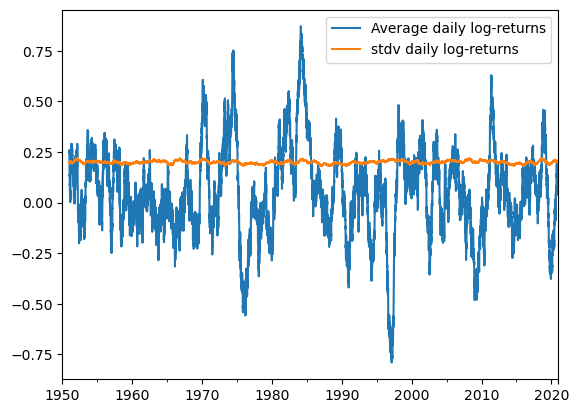

The estimated mean of the daily mean estimator is 0.05373, the theoretical one is mu=0.06000.
The estimated variance of the daily mean estimator is 0.04768, the theoretical one is sigma^2=0.04000.
The estimated mean of the daily variance estimator is 0.03980, the theoretical one is 0.04001.
The estimated variance of the daily variance estimator is 0.00001, the theoretical one is 0.00001.

The summary statistics for the weekly frequency are the following:

count    3705.000000
mean        0.001030
std         0.028058
min        -0.095961
25%        -0.018733
50%         0.000372
75%         0.020891
max         0.103956
dtype: float64

The annualized mean log-return for weekly frequency is 0.05355
The annualized std deviation for log-returns for weekly frequency is 0.20233


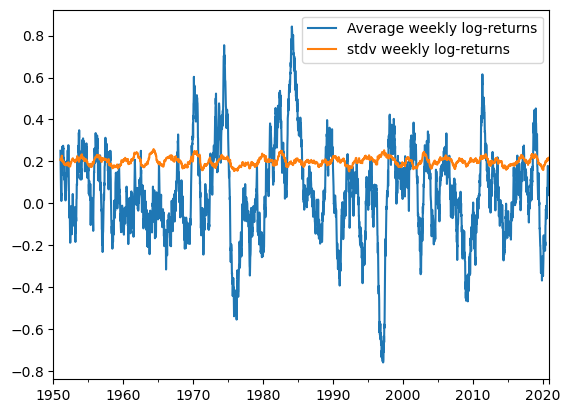

The summary statistics for the monthly frequency are the following:

count    851.000000
mean       0.004385
std        0.059390
min       -0.228876
25%       -0.037966
50%        0.005244
75%        0.044055
max        0.167288
dtype: float64

The annualized mean log-return for monthly frequency is 0.05263
The annualized std deviation for log-returns for monthly frequency is 0.20573


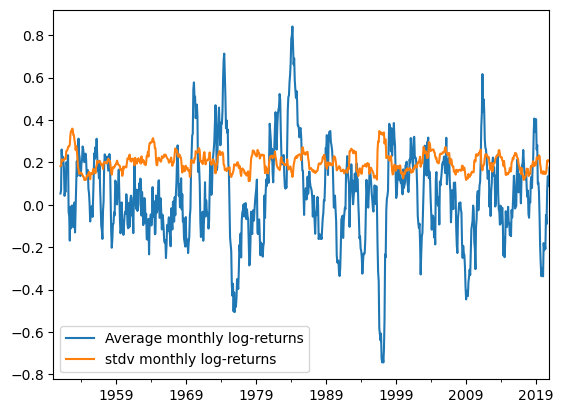

The estimated mean of the monthly mean estimator is 0.05278, the theoretical one is mu=0.06000.
The estimated variance of the monthly mean estimator is 0.04745, the theoretical one is sigma^2=0.04000.
The estimated mean of the monthly variance estimator is 0.04184, the theoretical one is 0.04030.
The estimated variance of the monthly variance estimator is 0.00037, the theoretical one is 0.00027.



In [81]:
# (a), We're doing all the steps within the for-loop to make it easier
sample_freq = ['D','W','M']
sample_legend = ['daily', 'weekly', 'monthly']
sample_periods = [365, 52, 12]
r_p3_list = []
for f in sample_freq:
    ind = sample_freq.index(f)
    legend = sample_legend[ind]
    periods = sample_periods[ind]
    # easier way than with for-loop
    s_p3 = s_p2.resample(f).last()
    r_p3_list.append(np.log(s_p3/s_p3.shift(1)))
    # we store the result in a temporary variable to avoid excessive index use
    r_p3 = r_p3_list[ind]
    
    # (b)
    descr = r_p3.describe()
    print('The summary statistics for the {} frequency are the following:\n'.format(legend))
    print(descr)
    
    # (c)
    ann_mean = r_p3.mean()*periods
    ann_stdev = r_p3.std()*np.sqrt(periods)
    print('\nThe annualized mean log-return for {} frequency is {:05.5f}'.format(legend, ann_mean))
    print('The annualized std deviation for log-returns for {} frequency is {:05.5f}'.format(legend, ann_stdev))
    
    # (d)
    roll_mean = r_p3.rolling(window=periods).mean()*periods
    roll_stdev = r_p3.rolling(window=periods).std()*np.sqrt(periods)
    roll_mean.plot(label='Average {} log-returns'.format(legend))
    roll_stdev.plot(label='stdv {} log-returns'.format(legend))
    
    plt.legend()
    plt.show()
    
    # (e) below
    
    # (f)
    if f == 'D' or f == 'M':
        mean_est_vect = r_p3.resample('A').mean()*periods
        var_est_vect = r_p3.resample('A').var()*periods
        
        mean_mean_est = mean_est_vect.mean()
        mean_var_est = mean_est_vect.var()
        print('The estimated mean of the {} mean estimator is {:.5f}, the theoretical one is mu={:.5f}.'.format(legend, mean_mean_est, MU))
        print('The estimated variance of the {} mean estimator is {:.5f}, the theoretical one is sigma^2={:.5f}.'.format(legend, mean_var_est, SIGMA**2))
        
        var_mean_est = var_est_vect.mean()
        var_var_est = var_est_vect.var()
        var_mean_th = SIGMA**2 + MU**2*1/periods
        var_var_th = 2*np.power(SIGMA,4)/periods + 4*MU**2*SIGMA**2*1/(periods**2)
        print('The estimated mean of the {} variance estimator is {:.5f}, the theoretical one is {:.5f}.'.format(legend, var_mean_est, var_mean_th))
        print('The estimated variance of the {} variance estimator is {:.5f}, the theoretical one is {:.5f}.{}'.format(legend, var_var_est, var_var_th, '\n'))
        
        
    

### Problem 3 (e)

The historical variation in the annualized mean is always between 5.064% (weekly frequency) and 5.274% (monthly frequency), which, while not being exactly the same, gets quite close and especially quite close to our actual mu of 6%.

The historical variation in the annualized standard deviation estimate is always between 19.982% (daily) and 20.402% (monthly), which also get quite close to our actual sigma of 20%.

We can therefore see that changing the sampling frequency does not really seem to affect these figures.

p.s. These figures held for our last run of the Jupyter notebook, please take into account the small differences in exact numbers due to randomness if you run it again.

### Problem 3 (f)
As we can see in the prints, the estimator for the mean and the variance (using the grouping by year method) is pretty accurate while comparing to the theoretical moments.
There are certainly some differences, but the means are estimated with similar accuracy when comparing the daily and monthly frequences and for the variance, the daily frequency does a very good job (the monthly a bit less).

## Problem 4 

Analysis for Apple:
The summary statistics for the daily frequency are the following:

count    5283.000000
mean        0.001260
std         0.022864
min        -0.197470
25%        -0.009418
50%         0.000958
75%         0.012591
max         0.130194
Name: ret, dtype: float64

The annualized mean log-return for daily frequency is 0.32142
The annualized std deviation for log-returns for daily frequency is 0.36511


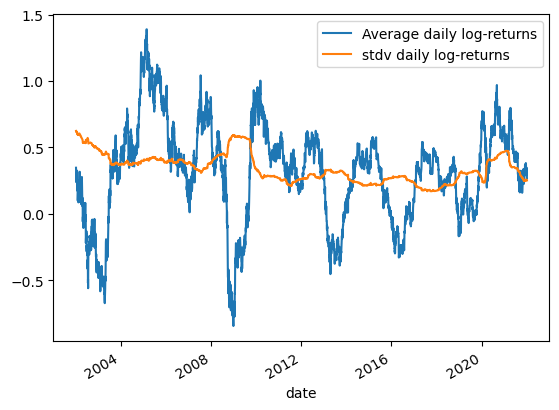

The summary statistics for the weekly frequency are the following:

count    1095.000000
mean        0.005994
std         0.047950
min        -0.278471
25%        -0.020959
50%         0.007706
75%         0.033908
max         0.236207
Name: ret, dtype: float64

The annualized mean log-return for weekly frequency is 0.31167
The annualized std deviation for log-returns for weekly frequency is 0.34577


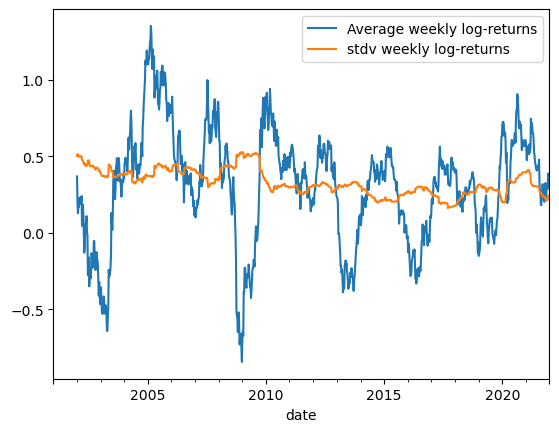

The summary statistics for the monthly frequency are the following:

count    251.000000
mean       0.025039
std        0.100412
min       -0.399818
25%       -0.032658
50%        0.041618
75%        0.092503
max        0.301776
Name: ret, dtype: float64

The annualized mean log-return for monthly frequency is 0.30047
The annualized std deviation for log-returns for monthly frequency is 0.34784


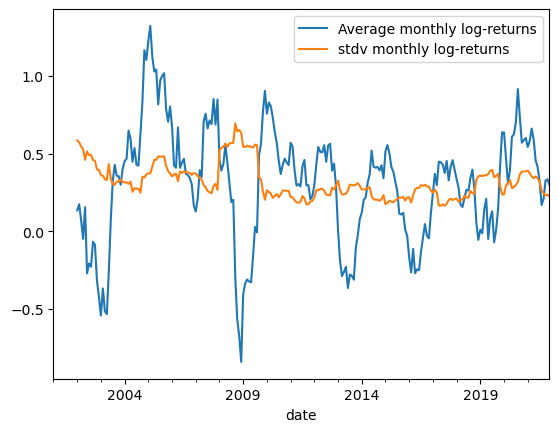

Analysis for GS:
The summary statistics for the daily frequency are the following:

count    5283.000000
mean        0.000302
std         0.022343
min        -0.210223
25%        -0.009835
50%         0.000342
75%         0.010760
max         0.234818
Name: ret, dtype: float64

The annualized mean log-return for daily frequency is 0.07700
The annualized std deviation for log-returns for daily frequency is 0.35679


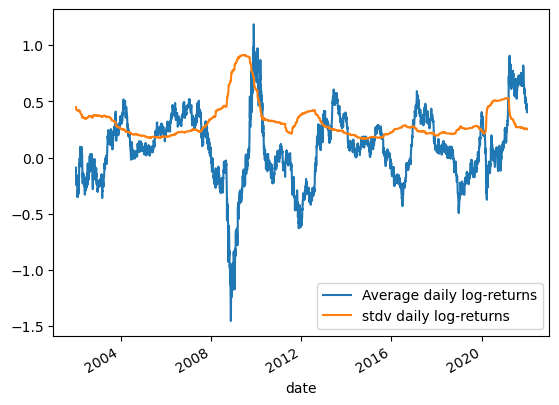

The summary statistics for the weekly frequency are the following:

count    1095.000000
mean        0.001390
std         0.047509
min        -0.365644
25%        -0.022453
50%         0.003336
75%         0.025723
max         0.393197
Name: ret, dtype: float64

The annualized mean log-return for weekly frequency is 0.07227
The annualized std deviation for log-returns for weekly frequency is 0.34259


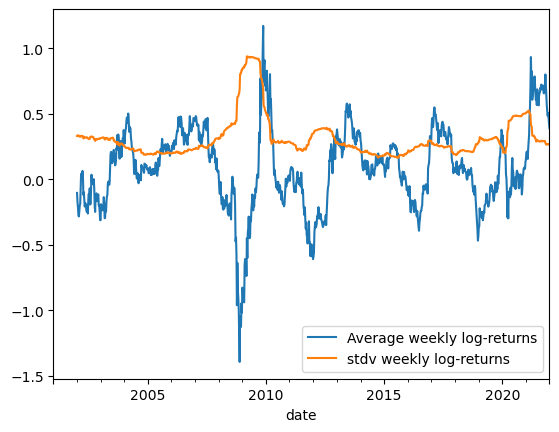

The summary statistics for the monthly frequency are the following:

count    251.000000
mean       0.005847
std        0.086282
min       -0.321603
25%       -0.050239
50%        0.015374
75%        0.058163
max        0.210329
Name: ret, dtype: float64

The annualized mean log-return for monthly frequency is 0.07017
The annualized std deviation for log-returns for monthly frequency is 0.29889


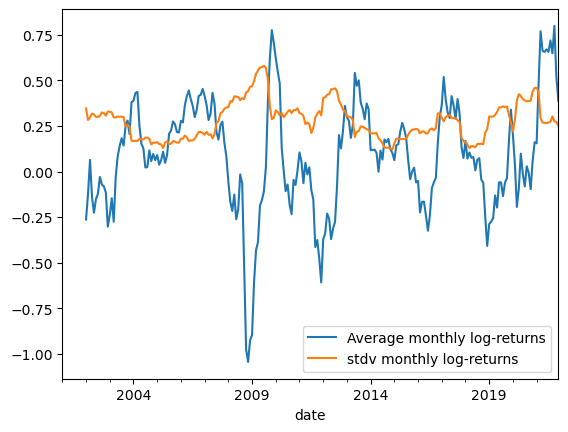

Analysis for MSFT:
The summary statistics for the daily frequency are the following:

count    5283.000000
mean        0.000606
std         0.018054
min        -0.159453
25%        -0.007695
50%         0.000384
75%         0.008983
max         0.170626
Name: ret, dtype: float64

The annualized mean log-return for daily frequency is 0.15441
The annualized std deviation for log-returns for daily frequency is 0.28831


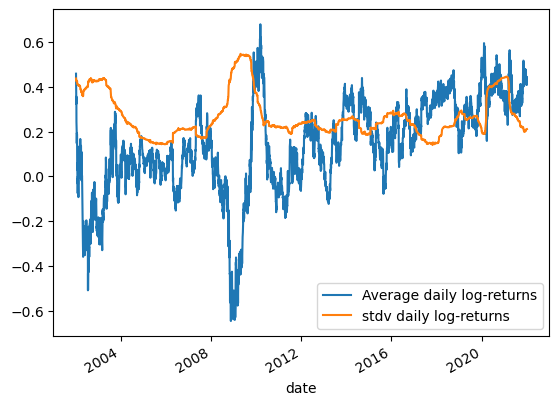

The summary statistics for the weekly frequency are the following:

count    1095.000000
mean        0.002808
std         0.035513
min        -0.202276
25%        -0.015644
50%         0.002824
75%         0.021769
max         0.149357
Name: ret, dtype: float64

The annualized mean log-return for weekly frequency is 0.14601
The annualized std deviation for log-returns for weekly frequency is 0.25609


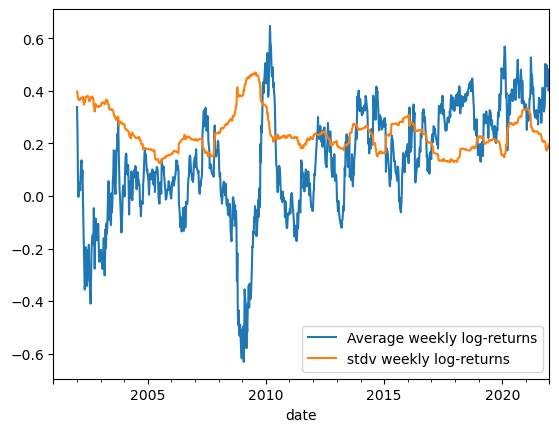

The summary statistics for the monthly frequency are the following:

count    251.000000
mean       0.011383
std        0.067844
min       -0.178358
25%       -0.034680
50%        0.018394
75%        0.053499
max        0.222736
Name: ret, dtype: float64

The annualized mean log-return for monthly frequency is 0.13659
The annualized std deviation for log-returns for monthly frequency is 0.23502


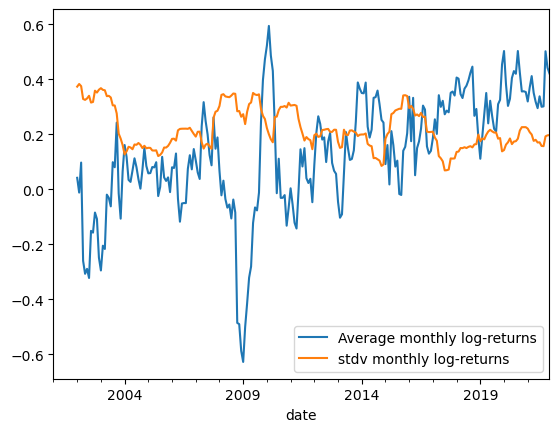

Analysis for P&G:
The summary statistics for the daily frequency are the following:

count    5283.000000
mean        0.000378
std         0.011739
min        -0.091428
25%        -0.004994
50%         0.000438
75%         0.005966
max         0.113409
Name: ret, dtype: float64

The annualized mean log-return for daily frequency is 0.09631
The annualized std deviation for log-returns for daily frequency is 0.18745


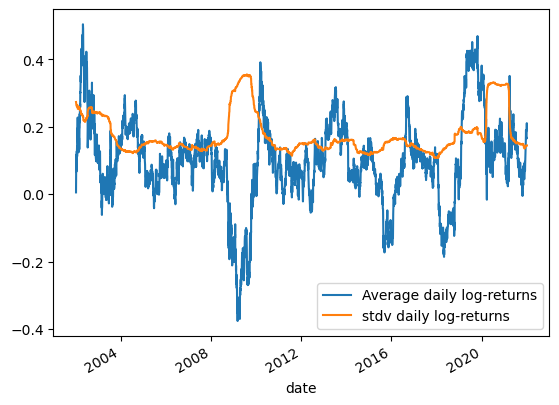

The summary statistics for the weekly frequency are the following:

count    1095.000000
mean        0.001865
std         0.023979
min        -0.175977
25%        -0.009496
50%         0.002433
75%         0.015102
max         0.122933
Name: ret, dtype: float64

The annualized mean log-return for weekly frequency is 0.09696
The annualized std deviation for log-returns for weekly frequency is 0.17292


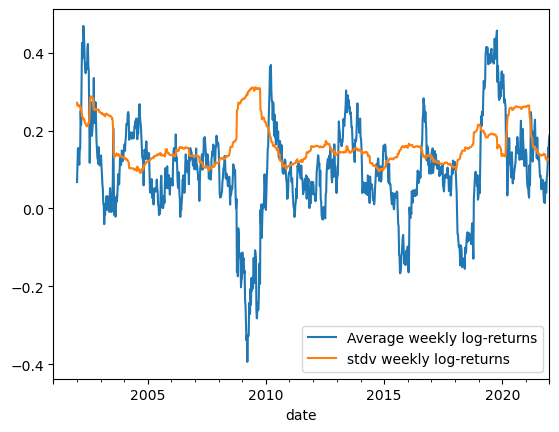

The summary statistics for the monthly frequency are the following:

count    251.000000
mean       0.008283
std        0.042958
min       -0.123464
25%       -0.018434
50%        0.009023
75%        0.034465
max        0.123469
Name: ret, dtype: float64

The annualized mean log-return for monthly frequency is 0.09939
The annualized std deviation for log-returns for monthly frequency is 0.14881


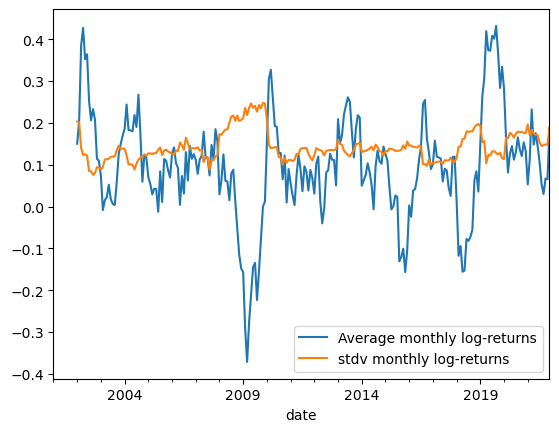

Analysis for GE:
The summary statistics for the daily frequency are the following:

count    5283.000000
mean       -0.000131
std         0.020981
min        -0.164394
25%        -0.008604
50%         0.000000
75%         0.008487
max         0.179844
Name: ret, dtype: float64

The annualized mean log-return for daily frequency is -0.03344
The annualized std deviation for log-returns for daily frequency is 0.33505


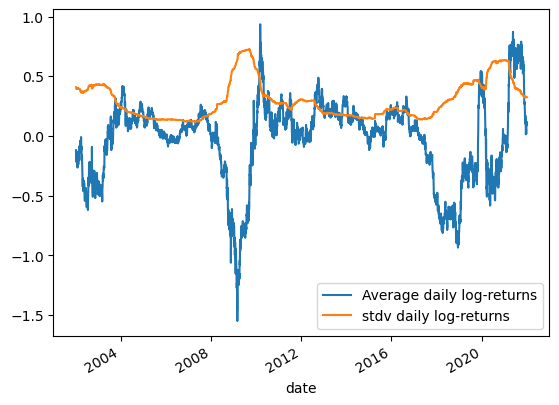

The summary statistics for the weekly frequency are the following:

count    1095.000000
mean       -0.000704
std         0.044606
min        -0.228878
25%        -0.019237
50%        -0.000325
75%         0.020979
max         0.309399
Name: ret, dtype: float64

The annualized mean log-return for weekly frequency is -0.03662
The annualized std deviation for log-returns for weekly frequency is 0.32166


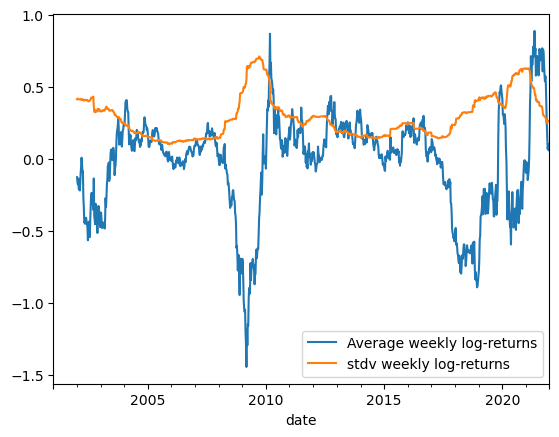

The summary statistics for the monthly frequency are the following:

count    251.000000
mean      -0.002958
std        0.086673
min       -0.324090
25%       -0.043401
50%       -0.003726
75%        0.043256
max        0.316246
Name: ret, dtype: float64

The annualized mean log-return for monthly frequency is -0.03550
The annualized std deviation for log-returns for monthly frequency is 0.30024


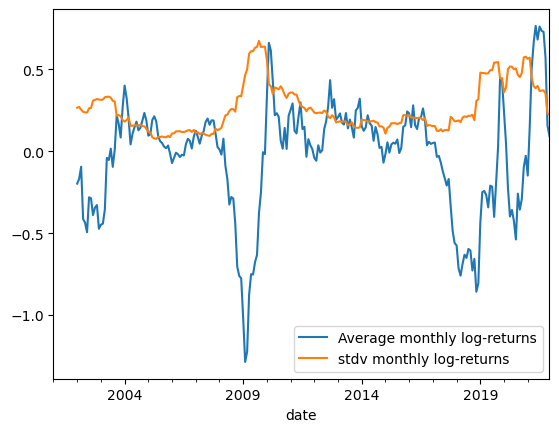

In [74]:
# We directly used the csv file on moodle because we didn't get the confirmation of wrds yet
# (d) reading the file
#NB: the 1st value is missing ..
real_data = pd.read_csv('Returns_Data.csv',delimiter=";")
real_data['date'] = pd.to_datetime(real_data['date'], format='%Y-%m-%d')
# to get the gross returns
real_data['ret'] = (real_data['ret']+1)

# since the data is available, we decided to work until 2021 instead of 2020
# we use the cumulative product in combination with the gross returns in order to get the data in a suitable form like before
real_data_apple = real_data.loc[real_data['permco']==7][['date', 'ret']].set_index('date')
real_data_apple['ret'] = real_data_apple['ret'].cumprod()
real_data_gs = real_data.loc[real_data['permco']==35048][['date', 'ret']].set_index('date')
real_data_gs['ret'] = real_data_gs['ret'].cumprod()
real_data_msft = real_data.loc[real_data['permco']==8048][['date', 'ret']].set_index('date')
real_data_msft['ret'] = real_data_msft['ret'].cumprod()
real_data_pg = real_data.loc[real_data['permco']==21446][['date', 'ret']].set_index('date')
real_data_pg['ret'] = real_data_pg['ret'].cumprod()
real_data_ge = real_data.loc[real_data['permco']==20792][['date', 'ret']].set_index('date')
real_data_ge['ret'] = real_data_ge['ret'].cumprod()


# (e)
data_list = [real_data_apple, real_data_gs, real_data_msft, real_data_pg, real_data_ge]
data_names = ['Apple', 'GS', 'MSFT', 'P&G', 'GE']
sample_freq = ['D','W','M']
sample_legend = ['daily', 'weekly','monthly']
sample_periods = [255,52,12]
ind_data = 0

for data in data_list:
    name = data_names[ind_data]
    r_p4_list = []
    print('Analysis for {}:'.format(name))
    
    for f in sample_freq:
        ind = sample_freq.index(f)
        legend = sample_legend[ind]
        periods = sample_periods[ind]
        if f != 'D':
            s_p4 = data['ret'].resample(f).last()
        else:
            s_p4 = data['ret']
        # easier way than with for-loop
        r_p4_list.append(np.log(s_p4/s_p4.shift(1)))
        # we store the result in a temporary variable to avoid excessive index use
        r_p4 = r_p4_list[ind]

        # (b) in P3
        descr = r_p4.describe()
        print('The summary statistics for the {} frequency are the following:\n'.format(legend))
        print(descr)

        # (c) in P3
        ann_mean = r_p4.mean()*periods
        ann_stdev = r_p4.std()*np.sqrt(periods)
        print('\nThe annualized mean log-return for {} frequency is {:05.5f}'.format(legend, ann_mean))
        print('The annualized std deviation for log-returns for {} frequency is {:05.5f}'.format(legend, ann_stdev))

        # (d) in P3
        roll_mean = r_p4.rolling(window=periods).mean()*periods
        roll_stdev = r_p4.rolling(window=periods).std()*np.sqrt(periods)
        roll_mean.plot(label='Average {} log-returns'.format(legend))
        roll_stdev.plot(label='stdv {} log-returns'.format(legend))

        plt.legend()
        plt.show()
    
    ind_data += 1
    



### Problem 4 (f)
The variation is a bit different from before: there are differences of about 1-3% between the different mean estimates across frequencies for each stock. It is the same case for standard deviation, but there the differences go up to 5% between the daily and the monthly sampling frequencies.

We can thus see that having more data points is important for robustness due to potentially more diverse observations in real data, which might not exactly follow a pre-established distribution (due to external causes at a few occasions).

### Problem 4 (g)
In all stocks, we see a huge drop at the beginning of the COVID crisis in the mean log-returns, apart from Microsoft (which experienced a small drop). This can be attributed to the nature of the industries of the companies.
All companies also saw an increase in the estimated standard deviation starting from the beginning of the crisis, at least in the daily and weekly frequences (due to the increased uncertainty leading to more volatility).
From what we can see, the estimated mean is reflected pretty well even with larger frequencies but the standard deviation estimate suffers more from the lack of data points.

Another observable crisis is the 2007-2008 financial crisis, reflected in the data by a drop in the estimated mean and an increase in the estimated standard deviation.